# Assignment 1&2 (CIFAR10)

1. [Get CIFAR10 dataset](#1.-Get-CIFAR10-dataset)
2. [FCNet on CIFAR10](#2.-FCNet-on-CIFAR10)  
    2.1 [SGD](#2.1-SGD)  
    2.2 [Momentum](#2.2-Momentum)  
    2.3 [Nesterov Momentum](#2.3-Nesterov-Momentum)  
    2.4 [Adagrad](#2.4-Adagrad)  
    2.5 [RMSProp](#2.5-RMSProp)  
    2.6 [Adam](#2.6-Adam)  
    2.7 [Comparison](#2.7-Comparison)  
    2.8 [Some failure cases](#2.8-Some-failure-cases)  

In [1]:
import sys
sys.path.append('../utils')
sys.path.append('../misc')

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from data_utils import download_cifar10, get_cifar10_data
from fc_neural_nets import FCNet
from vis_utils import *

%load_ext autoreload
%autoreload 2
%matplotlib inline

plt.rcParams['figure.figsize'] = (10.0, 5.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

## 1. Get CIFAR10 dataset

In [3]:
%%time
download_cifar10()

np.random.seed(67)
cifar10_data = get_cifar10_data(num_training=47500, num_validation=2500, shuffle=True)
X_train = cifar10_data['X_train']
y_train = cifar10_data['y_train']
X_val = cifar10_data['X_val']
y_val = cifar10_data['y_val']
X_test = cifar10_data['X_test']
y_test = cifar10_data['y_test']
classes = cifar10_data['classes']

print(type(X_train), X_train.dtype, '[', X_train.min(), ', ', X_train.max(), ']')
print(type(y_train), y_train.dtype, '[', y_train.min(), ', ', y_train.max(), ']')
print(classes, '\n')

print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape, '\n')

print('X_val: ', X_val.shape)
print('y_val: ', y_val.shape, '\n')

print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape, '\n')

<class 'numpy.ndarray'> float64 [ 0.0 ,  1.0 ]
<class 'numpy.ndarray'> int64 [ 0 ,  9 ]
['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'] 

X_train:  (47500, 3, 32, 32)
y_train:  (47500,) 

X_val:  (2500, 3, 32, 32)
y_val:  (2500,) 

X_test:  (10000, 3, 32, 32)
y_test:  (10000,) 

CPU times: user 4.35 s, sys: 1.39 s, total: 5.74 s
Wall time: 5.58 s


## 2. FCNet on CIFAR10

In [4]:
def train_a_fc_net(update_rule, update_params={}, classes=np.arange(10)):
    np.random.seed(67)
    fc_net = FCNet(input_dim=3*32*32)
    fc_net.optimize(X_train, y_train, X_val, y_val, 
                    batch_size=128, epochs=100,
                    update_rule=update_rule,
                    update_params=update_params)
    
    # best epoch (val set)
    best_val_epoch = fc_net.get_best_val_epoch()
    test_acc = FCNet.get_acc(fc_net.predict(X_test), y_test)
    print('update_rule: {}'.format(update_rule))
    print('best_val_epoch: {}'.format(best_val_epoch))
    print('val_acc at epoch {}:   {:.2f}%'.format(best_val_epoch, 100 * fc_net.get_best_val_acc()))
    print('test_acc at epoch {}:  {:.2f}%'.format(best_val_epoch, 100 * test_acc))
    print('train_acc at epoch {}: {:.2f}%\n'.format(best_val_epoch,
                                                    100 * fc_net.get_train_acc_history()
                                                    [best_val_epoch - 1]))
    
    # loss and acc
    train_loss = fc_net.get_train_loss_history()
    val_loss = fc_net.get_val_loss_history()
    train_acc = fc_net.get_train_acc_history()
    val_acc = fc_net.get_val_acc_history()
    plot_train_val_loss_acc(train_loss, val_loss, train_acc, val_acc, update_rule)
    
    # confusion matrix
    plt.figure(figsize=(13, 5))
    plt.subplot(1, 2, 1)
    y_val_pred = fc_net.predict(X_val)
    val_acc = FCNet.get_acc(y_val_pred, y_val)
    cm_title = 'Confusion matrix for validation set [{}, acc={:.1f}%]'.format(update_rule, 100 * val_acc)
    plot_confusion_matrix(y_val_pred, y_val, classes=classes,
                          normalize=True, title=cm_title)

    plt.subplot(1, 2, 2)
    y_test_pred = fc_net.predict(X_test)
    test_acc = FCNet.get_acc(y_test_pred, y_test)
    cm_title = 'Confusion matrix for test set [{}, acc={:.1f}%]'.format(update_rule, 100 * test_acc)
    plot_confusion_matrix(y_test_pred, y_test, classes=classes,
                          normalize=True, title=cm_title)

    plt.tight_layout()
    
    return fc_net

### 2.1 SGD

100%|██████████| 100/100 [08:45<00:00,  5.00s/it]


update_rule: sgd
best_val_epoch: 95
val_acc at epoch 95:   41.40%
test_acc at epoch 95:  42.52%
train_acc at epoch 95: 43.79%



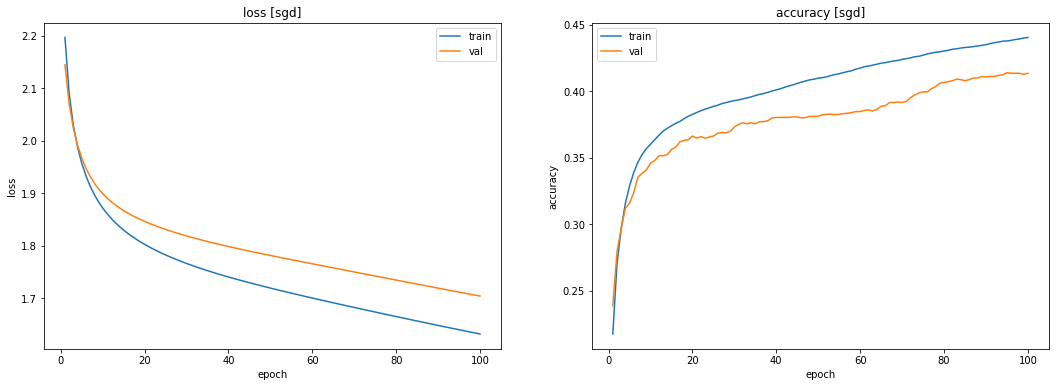

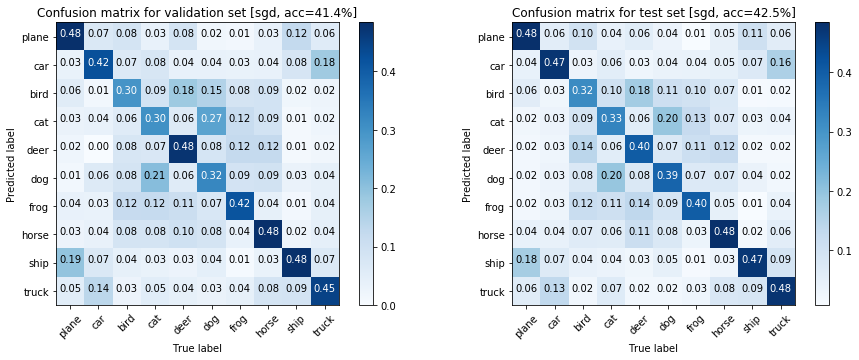

In [5]:
fc_net_sgd = train_a_fc_net(update_rule='sgd', 
                            update_params={
                                'lr': 1e-3
                            },
                            classes=classes)

### 2.2 Momentum

100%|██████████| 100/100 [10:18<00:00,  5.97s/it]


update_rule: momentum
best_val_epoch: 100
val_acc at epoch 100:   52.36%
test_acc at epoch 100:  52.72%
train_acc at epoch 100: 61.33%



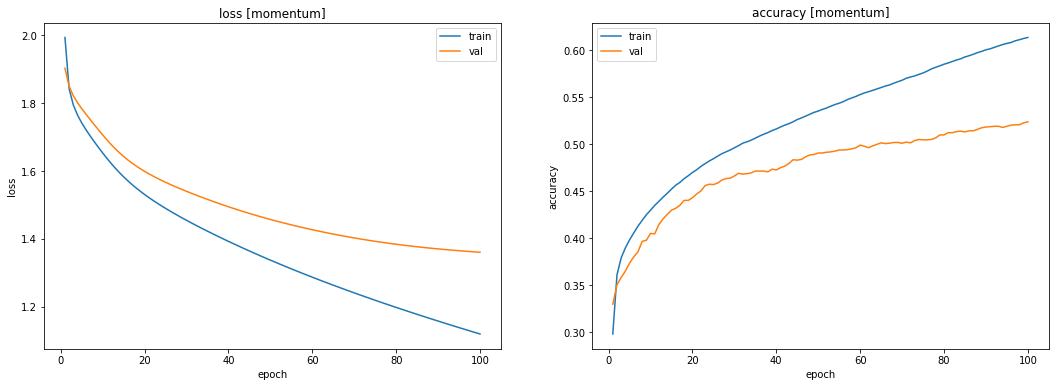

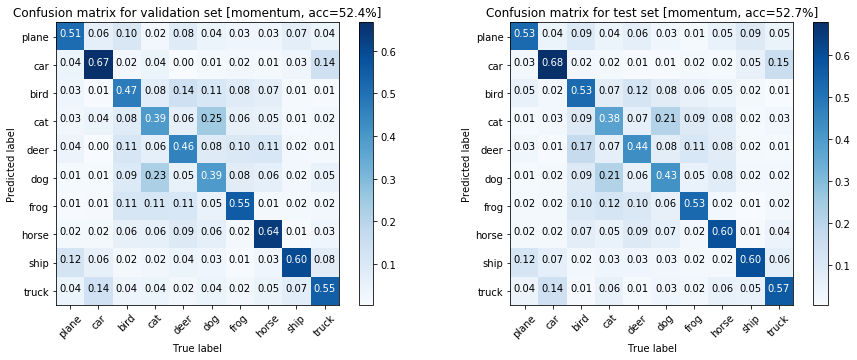

In [6]:
fc_net_momentum = train_a_fc_net(update_rule='momentum',
                                 update_params={
                                     'lr': 1e-3,
                                     'momentum': 0.9
                                 },
                                 classes=classes)

### 2.3 Nesterov Momentum

100%|██████████| 100/100 [12:30<00:00,  7.45s/it]


update_rule: nesterov
best_val_epoch: 99
val_acc at epoch 99:   53.52%
test_acc at epoch 99:  53.13%
train_acc at epoch 99: 61.66%



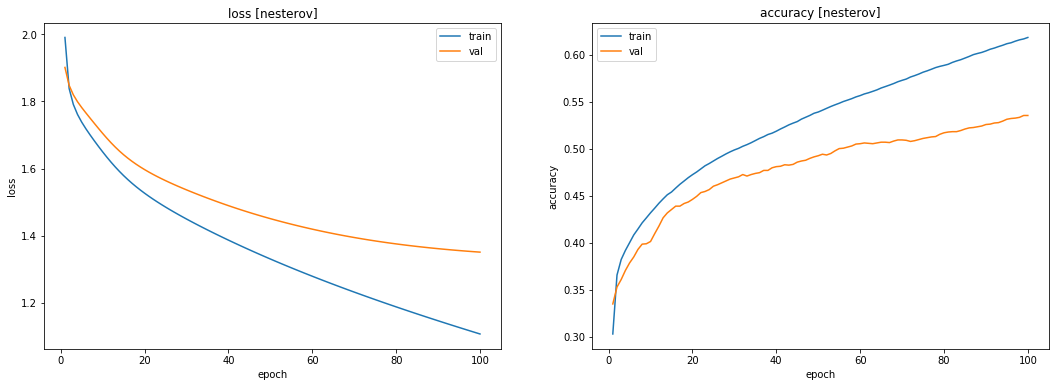

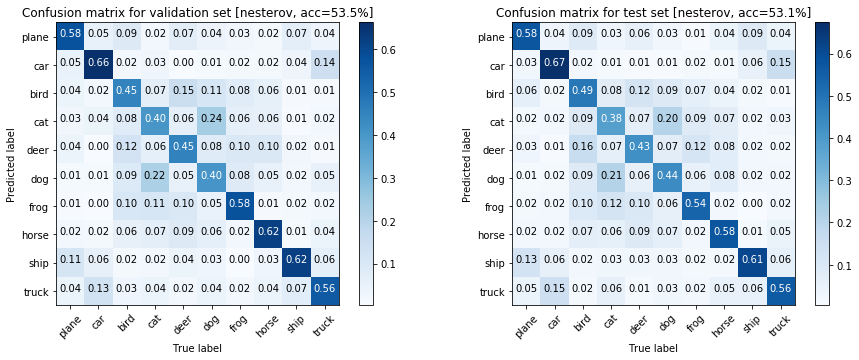

In [7]:
fc_net_nesterov = train_a_fc_net(update_rule='nesterov',
                                 update_params={
                                     'lr': 1e-3,
                                     'momentum': 0.9
                                 },
                                 classes=classes)

### 2.4 Adagrad

100%|██████████| 100/100 [16:05<00:00,  9.81s/it]


update_rule: adagrad
best_val_epoch: 91
val_acc at epoch 91:   47.52%
test_acc at epoch 91:  47.47%
train_acc at epoch 91: 50.62%



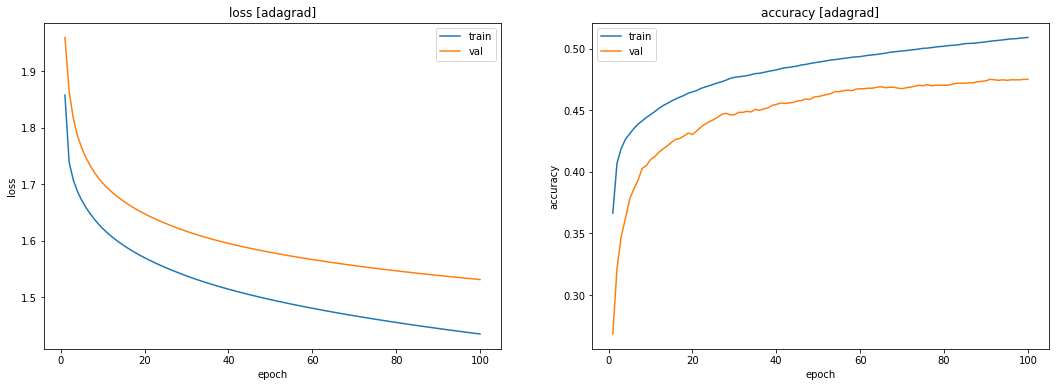

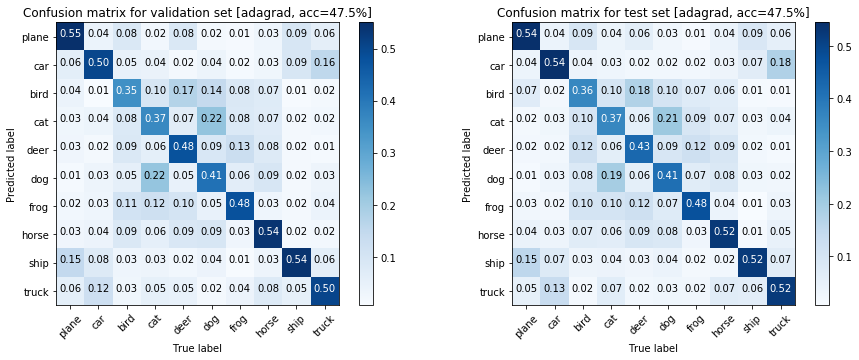

In [8]:
fc_net_adagrad = train_a_fc_net(update_rule='adagrad',
                                update_params={
                                    'lr': 1e-3
                                },
                                classes=classes)

### 2.5 RMSProp

100%|██████████| 100/100 [17:26<00:00, 10.49s/it]


update_rule: rmsprop
best_val_epoch: 72
val_acc at epoch 72:   45.44%
test_acc at epoch 72:  44.97%
train_acc at epoch 72: 66.57%



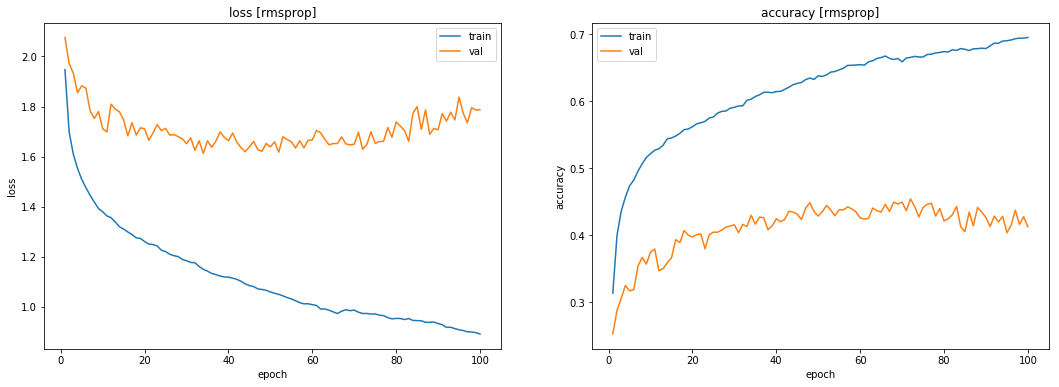

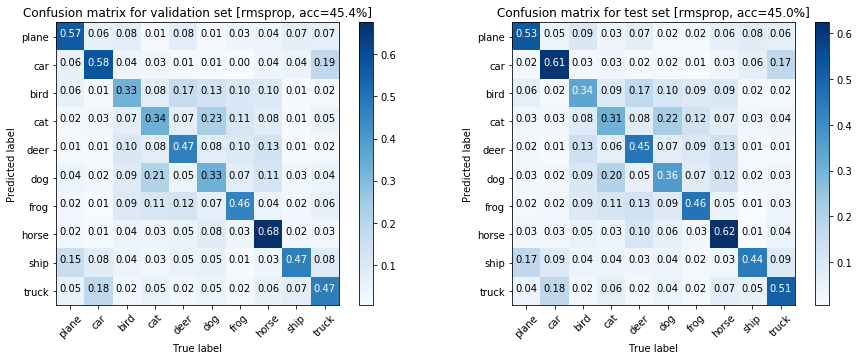

In [9]:
fc_net_rmsprop = train_a_fc_net(update_rule='rmsprop',
                                update_params={
                                    'lr': 1e-3,
                                    'decay_rate': 0.9
                                },
                                classes=classes)

### 2.6 Adam

100%|██████████| 100/100 [16:32<00:00,  9.98s/it]


update_rule: adam
best_val_epoch: 88
val_acc at epoch 88:   41.96%
test_acc at epoch 88:  42.82%
train_acc at epoch 88: 50.93%



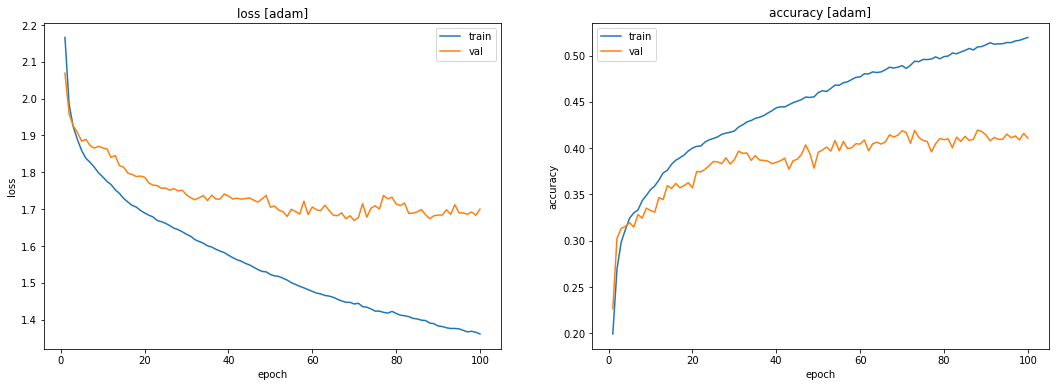

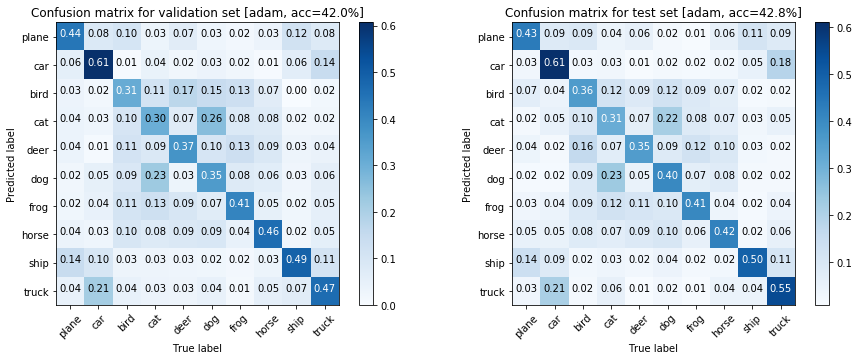

In [10]:
fc_net_adam = train_a_fc_net(update_rule='adam',
                             update_params={
                                 'lr': 1e-3,
                                 'beta1': 0.9,
                                 'beta2': 0.999
                             },
                             classes=classes)

### 2.7 Comparison

In [11]:
def extract_loss_history(fc_net):
    train_loss = fc_net.get_train_loss_history()
    val_loss = fc_net.get_val_loss_history()
    return train_loss, val_loss

def extract_acc_history(fc_net):
    train_acc = fc_net.get_train_acc_history()
    val_acc = fc_net.get_val_acc_history()
    return train_acc, val_acc

In [12]:
sgd_train_loss, sgd_val_loss = extract_loss_history(fc_net_sgd)
sgd_train_acc, sgd_val_acc = extract_acc_history(fc_net_sgd)

momentum_train_loss, momentum_val_loss = extract_loss_history(fc_net_momentum)
momentum_train_acc, momentum_val_acc = extract_acc_history(fc_net_momentum)

nesterov_train_loss, nesterov_val_loss = extract_loss_history(fc_net_nesterov)
nesterov_train_acc, nesterov_val_acc = extract_acc_history(fc_net_nesterov)

adagrad_train_loss, adagrad_val_loss = extract_loss_history(fc_net_adagrad)
adagrad_train_acc, adagrad_val_acc = extract_acc_history(fc_net_adagrad)

rmsprop_train_loss, rmsprop_val_loss = extract_loss_history(fc_net_rmsprop)
rmsprop_train_acc, rmsprop_val_acc = extract_acc_history(fc_net_rmsprop)

adam_train_loss, adam_val_loss = extract_loss_history(fc_net_adam)
adam_train_acc, adam_val_acc = extract_acc_history(fc_net_adam)

epochs = np.arange(len(sgd_train_loss)) + 1

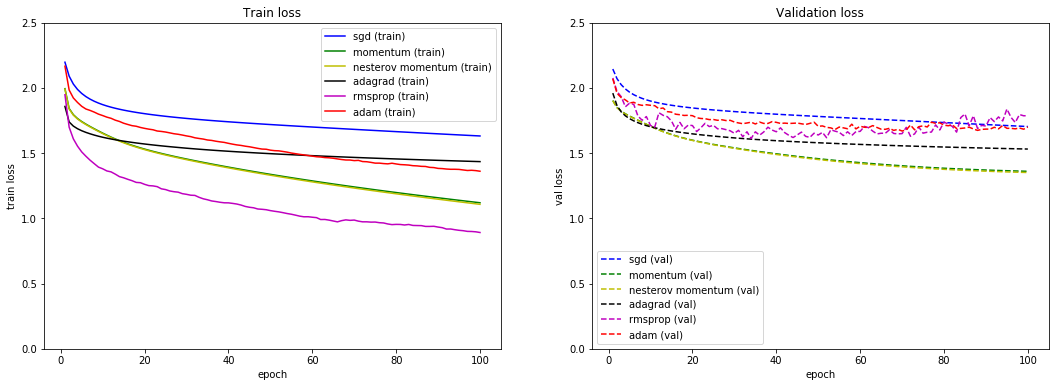

In [13]:
plt.figure(figsize=(18, 6))

# train loss
plt.subplot(1, 2, 1)
plt.title('Train loss')
plt.ylim(0, 2.5)
plt.plot(epochs, sgd_train_loss, 'b', label='sgd (train)')
plt.plot(epochs, momentum_train_loss, 'g', label='momentum (train)')
plt.plot(epochs, nesterov_train_loss, 'y', label='nesterov momentum (train)')
plt.plot(epochs, adagrad_train_loss, 'k', label='adagrad (train)')
plt.plot(epochs, rmsprop_train_loss, 'm', label='rmsprop (train)')
plt.plot(epochs, adam_train_loss, 'r', label='adam (train)')
plt.legend()
plt.ylabel('train loss')
plt.xlabel('epoch')

# val loss
plt.subplot(1, 2, 2)
plt.title('Validation loss')
plt.ylim(0, 2.5)
plt.plot(epochs, sgd_val_loss, 'b--', label='sgd (val)')
plt.plot(epochs, momentum_val_loss, 'g--', label='momentum (val)')
plt.plot(epochs, nesterov_val_loss, 'y--', label='nesterov momentum (val)')
plt.plot(epochs, adagrad_val_loss, 'k--', label='adagrad (val)')
plt.plot(epochs, rmsprop_val_loss, 'm--', label='rmsprop (val)')
plt.plot(epochs, adam_val_loss, 'r--', label='adam (val)')
plt.legend()
plt.ylabel('val loss')
plt.xlabel('epoch')

plt.show()

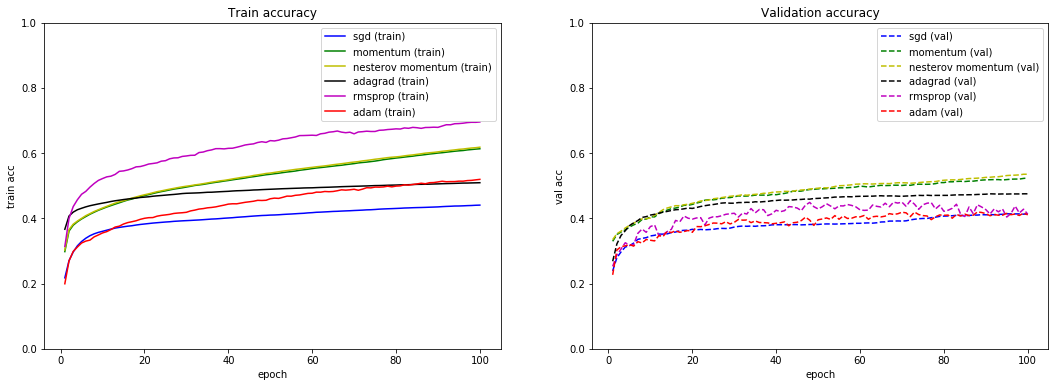

In [14]:
plt.figure(figsize=(18, 6))

# train acc
plt.subplot(1, 2, 1)
plt.title('Train accuracy')
plt.ylim(0, 1)
plt.plot(epochs, sgd_train_acc, 'b', label='sgd (train)')
plt.plot(epochs, momentum_train_acc, 'g', label='momentum (train)')
plt.plot(epochs, nesterov_train_acc, 'y', label='nesterov momentum (train)')
plt.plot(epochs, adagrad_train_acc, 'k', label='adagrad (train)')
plt.plot(epochs, rmsprop_train_acc, 'm', label='rmsprop (train)')
plt.plot(epochs, adam_train_acc, 'r', label='adam (train)')
plt.legend()
plt.ylabel('train acc')
plt.xlabel('epoch')

# val acc
plt.subplot(1, 2, 2)
plt.title('Validation accuracy')
plt.ylim(0, 1)
plt.plot(epochs, sgd_val_acc, 'b--', label='sgd (val)')
plt.plot(epochs, momentum_val_acc, 'g--', label='momentum (val)')
plt.plot(epochs, nesterov_val_acc, 'y--', label='nesterov momentum (val)')
plt.plot(epochs, adagrad_val_acc, 'k--', label='adagrad (val)')
plt.plot(epochs, rmsprop_val_acc, 'm--', label='rmsprop (val)')
plt.plot(epochs, adam_val_acc, 'r--', label='adam (val)')
plt.legend()
plt.ylabel('val acc')
plt.xlabel('epoch')

plt.show()

In [15]:
def print_test_acc(fc_net, update_rule):
    best_val_epoch = fc_net.get_best_val_epoch()
    test_acc = FCNet.get_acc(fc_net.predict(X_test), y_test)
    print('update_rule: {}'.format(update_rule))
    print('test_acc at epoch {}:  {:.2f}%'.format(best_val_epoch, 100 * test_acc))
    print('train_acc at epoch {}: {:.2f}%\n'.format(best_val_epoch,
                                                    100 * fc_net.get_train_acc_history()
                                                    [best_val_epoch - 1]))
    
print('Summary:\n')
print_test_acc(fc_net_sgd, 'sgd')
print_test_acc(fc_net_momentum, 'momentum')
print_test_acc(fc_net_nesterov, 'nesterov')
print_test_acc(fc_net_adagrad, 'adagrad')
print_test_acc(fc_net_rmsprop, 'rmsprop')
print_test_acc(fc_net_adam, 'adam')

Summary:

update_rule: sgd
test_acc at epoch 95:  42.52%
train_acc at epoch 95: 43.79%

update_rule: momentum
test_acc at epoch 100:  52.72%
train_acc at epoch 100: 61.33%

update_rule: nesterov
test_acc at epoch 99:  53.13%
train_acc at epoch 99: 61.66%

update_rule: adagrad
test_acc at epoch 91:  47.47%
train_acc at epoch 91: 50.62%

update_rule: rmsprop
test_acc at epoch 72:  44.97%
train_acc at epoch 72: 66.57%

update_rule: adam
test_acc at epoch 88:  42.82%
train_acc at epoch 88: 50.93%



### 2.8 Some failure cases

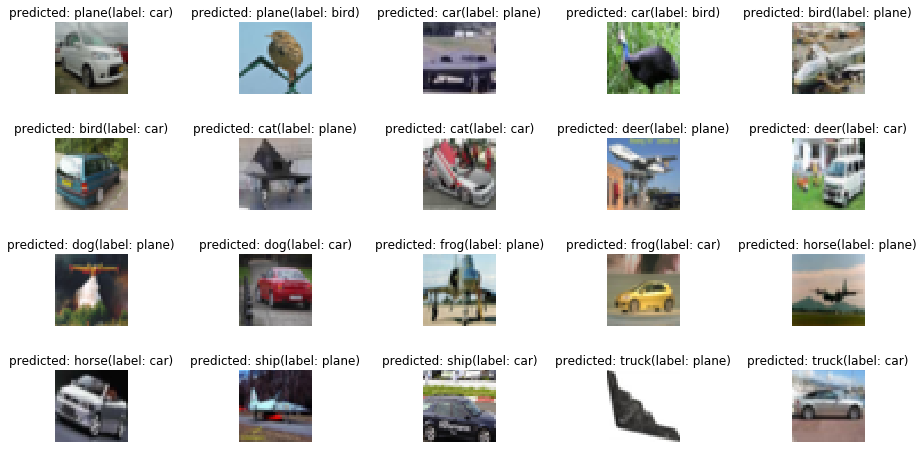

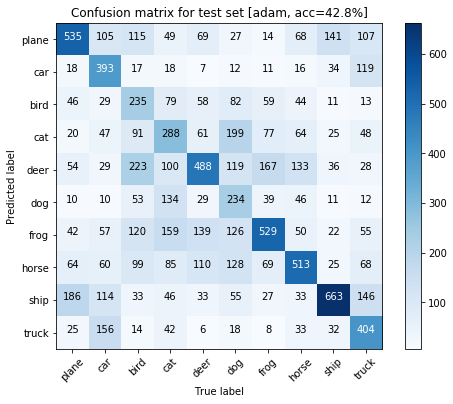

In [16]:
update_rule = 'adam'
fc_net = fc_net_adam

y_test_pred = fc_net.predict(X_test)

plt.figure(figsize=(13, 16))
num = 0
for i in range(10):
    viz = 0
    for j in range(10):
        if i != j and viz < 2:
            indices = np.argwhere((y_test_pred == i) * (y_test == j))
            if len(indices) > 0:
                viz += 1
                num += 1
                idx = indices[0][0]
                plt.subplot(10, 5, num)
                plt.imshow(X_test[idx].transpose(1, 2, 0).astype(np.float32))
                plt.axis('off')
                plt.title('predicted: {}(label: {})'.format(classes[i], classes[j]))

plt.tight_layout()

test_acc = FCNet.get_acc(y_test_pred, y_test)
cm_title = 'Confusion matrix for test set [{}, acc={:.1f}%]'.format(update_rule, 100 * test_acc)
plot_confusion_matrix(y_test_pred, y_test, classes=classes,
                      normalize=False, new_figure=True, title=cm_title)